In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
crops = pd.read_csv("../data/soil_measures.csv")

In [3]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [4]:
print("Number of crops: ", len(crops["crop"].unique()))
crops["crop"].unique()

Number of crops:  22


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [6]:
crops["crop"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

In [7]:
# Split data
X = crops.drop("crop", axis=1)
y = crops["crop"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=crops["crop"])


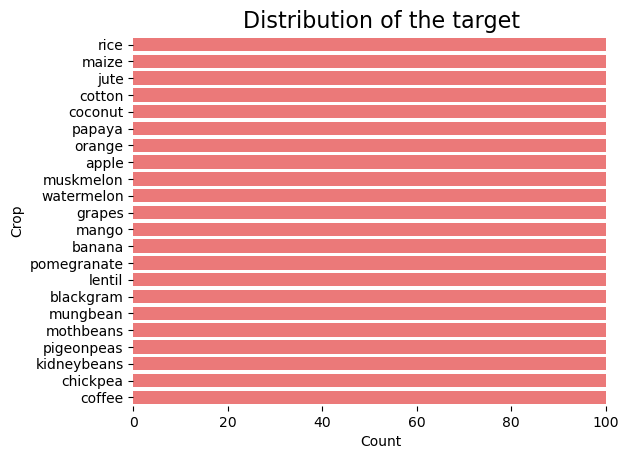

In [8]:
#create horizontal bar chart
sns.barplot(y=crops["crop"].value_counts().index, 
            x=crops["crop"].value_counts().values, 
            color='red',
            alpha = 0.6, 
            orient='h')

plt.title('Distribution of the target', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Crop')
sns.despine(left=True, bottom=True)
plt.show()

In [9]:
F1_scores = []
for feature in crops.drop("crop", axis=1).columns.to_list():
    lgreg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    lgreg.fit(X_train[[feature]],y_train)
    F1_scores.append(f1_score(y_test, lgreg.predict(X_test[[feature]]), average="weighted"))

In [10]:
F1_scored_df = pd.DataFrame({
    "Feature": crops.drop("crop", axis=1).columns.to_list(),
    "F1_score": F1_scores
})
F1_scored_df

,Feature,F1_score
0,N,0.116888
1,P,0.165314
2,K,0.279804
3,ph,0.074689


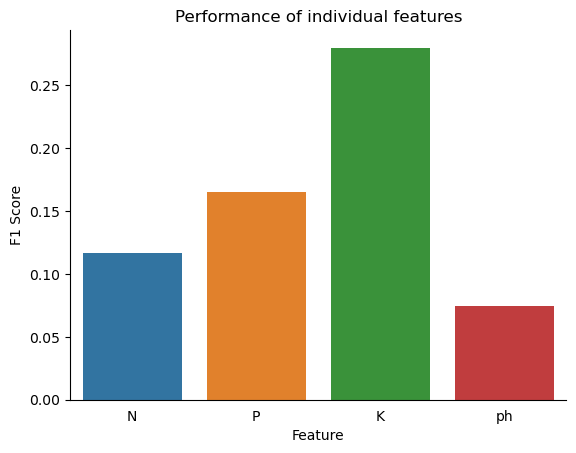

In [11]:
g = sns.barplot(data=F1_scored_df, x="Feature", y="F1_score")
sns.despine(right=True, top=True)
g.set_ylabel("F1 Score")
plt.title('Performance of individual features')
g.tick_params(bottom=False)
plt.show()



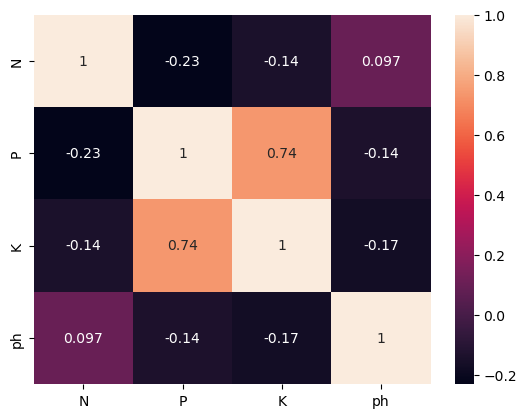

In [12]:
# Correlation analysis 
sns.heatmap(crops.drop("crop", axis=1).corr(),annot=True)
plt.show()


In [13]:
X = crops.drop(["P", "crop"], axis=1) #final_features =['N','K','ph']
y = crops["crop"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
log_reg.fit(X_train,y_train)
model_performance = f1_score(y_test, log_reg.predict(X_test), average="weighted")
print(model_performance)

0.5711141782888831
